# <b> Đồ án 1 - Nén màu (Color Compression) </b></br>
Họ và tên: Nguyễn Mạnh Hùng</br>
MSSV: 20127030</br>

In [ ]:
# Cài đặt thư viện
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Các hàm chương trình

<b> Hàm đọc ảnh </b>
<ul>
  <li>Input: đường dẫn của ảnh</li>
  <li>Output: ảnh được lưu trữ ở dạng numpy</li>
</ul>

In [ ]:
def ReadImage(path):
    image = Image.open(path)
    result = np.array(image)
    return result

<b>Hàm hiển thị ảnh</b></br>
Hàm dùng để hiển thị kết quả hình ảnh.
<ul>
  <li>Input: tham số ảnh ở dạng mảng numpy, chuỗi để đặt tiêu đề của ảnh</li>
  <li>Output: hiển thị ảnh ở dạng kích thước gốc cùng với tiêu đề tương ứng đã được đặt</li>
</ul>

In [ ]:
def ShowImage(img, string = None):
    plt.title(string)
    plt.axis('off')
    plt.imshow(img)

<b> Hàm làm phẳng ảnh </b></br>
Hàm có công dụng đưa mảng lưu trữ ảnh màu có kích thước (dài, rộng, 3) về mảng 2 chiều.
<ul>
  <li>Input: tham số ảnh ở dạng mảng numpy có kích thước dài x rộng x 3 </li>
  <li>Output: tham số ảnh ở dạng mảng numpy 2 chiều (2D array) với kích thước là (dài x rộng, 3), các điểm ảnh có giá trị thuộc khoảng [0,1]</li>
</ul>

In [ ]:
def Flattern(img):
    result = (img/255).reshape(img.shape[0]*img.shape[1],3)
    return result

<b> Hàm tính khoảng cách </b></br>
Tính khoảng cách giữa điểm ảnh tới các centroids
<ul>
  <li>Input: các điểm ảnh, các centroids </li>
  <li>Output: ma trận lưu các khoảng cách giữa các centroids đến từng điểm ảnh trong ảnh</li>
</ul>

In [ ]:
def distance(x, y):
   return np.sqrt(np.sum(np.power((x-y),2)))

<b> Hàm khởi tạo </b></br>
Khởi tạo các centroid theo 2 pp lần lượt là random theo giá trị kênh màu và random theo giá trị màu của pixel
<ul>
  <li>Input: số cluster, phương thức tạo, ảnh ở dạng mảng numpy </li>
  <li>Output: mảng các cluster đã khỏi tạo</li>
</ul>

In [ ]:
def initialize(img, k, init_cluster = None):
    pixels, channel = img.shape
    centroids = np.zeros((k, channel))

    if init_cluster == "in_pixels":
        for i in range(k):
            centroids[i] = img[np.random.randint(0,pixels+1),:]
    elif init_cluster == "random":
        color = np.arange(0, 256)/255
        for i in range(k):
            # size != 0 để khởi tạo giá trị cho 3 kênh màu k bị trùng nhau.
            valueR = np.random.choice(color, size= 3, replace= False)
            valueG = np.random.choice(color, size= 3, replace= False)
            valueB = np.random.choice(color, size= 3, replace= False)
            centroids[i] = [np.mean(valueR),np.mean(valueG),np.mean(valueB)] # lấy trung bình của 3 giá trị màu để màu gần với các điểm màu trong ảnh

    return centroids

<b> Hàm tìm centroid gần nhất </b></br>
Tính các giá trị khoảng cách từ các điểm ảnh đến k centroids và trả về vector chứa giá trị điểm ảnh gần nhất ứng với k centroids
<ul>
  <li>Input: số cluster, ảnh 1d và centroid </li>
  <li>Output: mảng lưu các giá trị khoảng cách nhỏ nhất đến centroids tương ứng với các điểm ảnh</li>
</ul>

In [ ]:
def findClosestCentroids(K, img,centriods):
    pixels = img.shape[0]
    length = len(centriods)
    idx =  np.zeros((pixels,1))
    for i in range(pixels):
        displaydata = np.zeros((1,K))
        for j in range(length):
            displaydata[:,j] = distance(img[i,:],centriods[j,:])
        idx[i] = np.argmin(displaydata)+1
    return idx


<b> Hàm cập nhật các centroid </b></br>
Tiến hành gom nhóm bằng cách cập nhật các giá trị centroids sau khi tìm được các giá trị màu gần chúng
<ul>
  <li>Input: số cluster, label của các pixels </li>
  <li>Output: mảng các cluster mới đã cập nhật vị trí</li>
</ul>

In [ ]:
def computeCentroids(K,img,idx):
    pixels, channel = img.shape
    centroids = np.zeros((K,channel))
    count = np.zeros((K,1))
    for i in range(pixels):
        index = int(idx[i].item()-1)
        centroids[index,:] += img[i,:]
        count[index]+=1
    return centroids/count

<b> Hàm kiểm tra điều kiện dừng </b></br>
kiểm tra các giá trị trước và sau khi cập nhật có khác nhau không? Nếu có thì dừng
<ul>
  <li>Input: centroids mới, centroids cũ </li>
  <li>Output: True hoặc False</li>
</ul>

In [ ]:
def condition(old_centroids, new_centroids):
    result = new_centroids - old_centroids
    return np.allclose(result, 0)

<b>Hàm gom nhóm màu</b></br>
Hàm sẽ dùng thuật toán gom nhóm K-mean để gom nhóm các màu lại với nhau nhằm lược giản các màu trong ảnh.</br>
Hàm bao gồm:
<ul>
  <li>Input: ảnh đã được làm phẳng, số lượng nhóm cần gom (k-cluster), cách thức khởi tạo centroids, số lần lặp tối đa</li>
  <li>Output: trả về các centroid và labels</li>
</ul>

In [ ]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    X = img_1d.copy()
    centroids = initialize(img_1d, k_clusters, init_centroids)
    label = findClosestCentroids(k_clusters, X, centroids)
    for _ in range(max_iter):
        new_centroids =  computeCentroids(k_clusters, X, label)
        if condition(centroids, new_centroids):
            break
        label = findClosestCentroids(k_clusters, X, centroids)
    return centroids, label.reshape(-1)

<b>Hàm nén ảnh</b></br>
Áp dụng kết quả của thuật toán gom nhóm màu để nén ảnh.</br>
Hàm bao gồm:
<ul>
  <li>Input: mảng lưu ảnh, số lượng nhóm cần gom (k-cluster), các centroids, các labels</li>
  <li>Output: ảnh được đã được lược giản màu tương ứng với các thông số truyền vào</li>
</ul>

In [ ]:
def CompressedImage(img,k_clusters,compressed_centroid, compressed_labels):
    img_Compressed = img.copy()
    for i in range(1,k_clusters+1):
        img_Compressed[(compressed_labels == i),:] = compressed_centroid[i-1]
    return img_Compressed

<b>Hàm lưu ảnh</b></br>
Lưu lại kết quả hình ảnh sau khi nén.</br>
Hàm bao gồm:
<ul>
  <li>Input: mảng lưu ảnh đã nén, định dạng (PDF, PNG)</li>
  <li>Output: file lưu ảnh tương ứng với định dạng đã truyền vào</li>
</ul>

In [ ]:
def SaveImage(img_arr, format, K, method):
    print("Saving result...")
    if format == "PNG":
        plt.axis('off')
        plt.imsave(f'compressed_{method}_{K}.png', img_arr)
    elif format == "PDF":
        plt.axis('off')
        plt.imsave(f'compressed_{method}_{K}.pdf', img_arr, format = "pdf")
    else:
        print('Wrong format!!!')

<b>Hàm main</b></br>
Nơi thực hiện toàn bộ chương trình thông qua các hàm phía trước theo trình tự</br>
Hàm bao gồm:
<ul>
  <li>Input:giá trị K, phương thức khởi tạo clustering, định dạng (PDF, PNG), ảnh</li>
  <li>Output: Hiển thị kết quả của từng trình tự và file lưu ảnh tương ứng với định dạng đã truyền vào</li>
</ul>

In [ ]:
def main(K, method, format, image):
    img_1d = Flattern(image)
    centroids, labels = kmeans(img_1d, k_clusters = K, max_iter = 10, init_centroids = method)
    result = CompressedImage(img = img_1d, k_clusters = K, compressed_centroid = centroids, compressed_labels = labels)
    result = result.reshape(image.shape[0],image.shape[1],3)
    ShowImage(result, string=f"compress with k = {K}, image shape: {result.shape}")
    SaveImage(result, format, K, method)


---

## Thực Nghiệm

In [ ]:
method1 = "random"
method2 = "in_pixels"
path = input("Nhập đúng tên ảnh hay đường dẫn ảnh mà bạn muốn xử lý:")

Nhập đúng tên ảnh hay đường dẫn ảnh mà bạn muốn xử lý:SSG_Xayha.jpg


Tên ảnh truyền vào khi test chương trình là SSG_Xayha.jpg</br>
Link ảnh: https://64.media.tumblr.com/68a2f2e68fb32d4a73fd9d879f2f4ae4/tumblr_pb7opouO411vo6vclo4_400.jpg

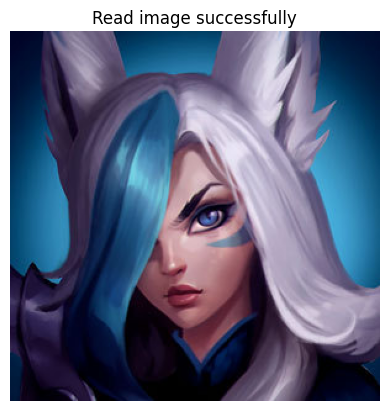

In [ ]:
img = ReadImage(path)
ShowImage(img, "Read image successfully")

### phương thức khởi tạo random

k = 3

Saving result...


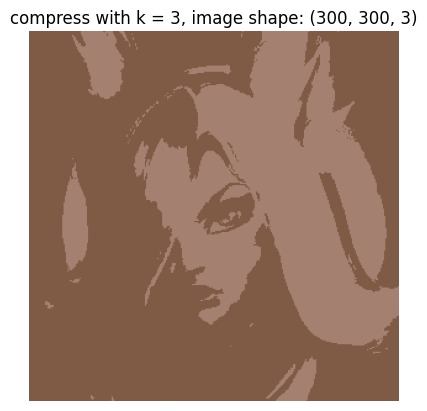

In [ ]:
main(K= 3, method= method1, format= "PNG", image= img)

k = 5

Saving result...


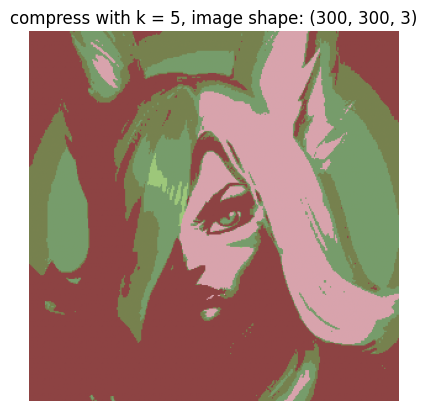

In [ ]:
main(K= 5, method= method1, format= "PNG", image= img)

k = 7

Saving result...


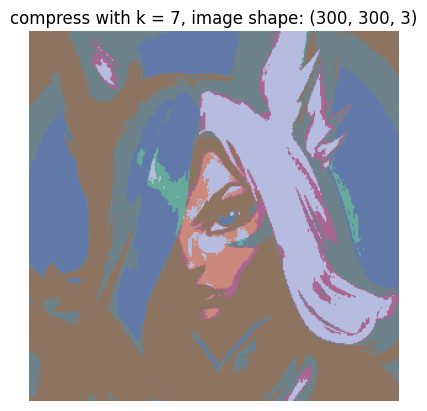

In [ ]:
main(K= 7, method= method1, format= "PNG", image= img)

k = 12

Saving result...


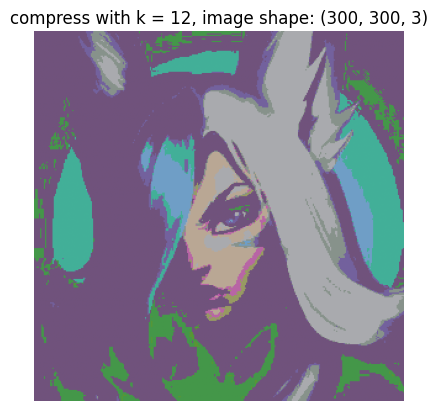

In [ ]:
main(K= 12, method= method1, format= "PNG", image= img)

k = 16

C:\Users\nguye\AppData\Local\Temp\ipykernel_5844\1037504694.py:9: RuntimeWarning: invalid value encountered in divide
  return centroids/count


Saving result...


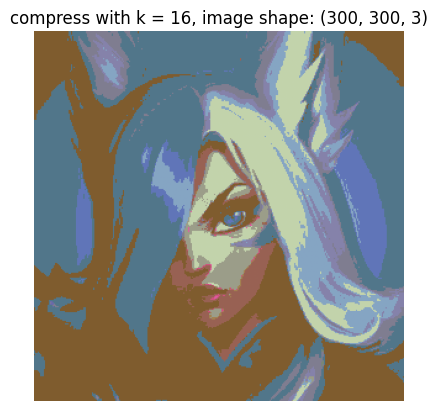

In [ ]:
main(K= 16, method= method1, format= "PNG", image= img)

### phương thức khởi tạo in_pixels

k = 3

Saving result...


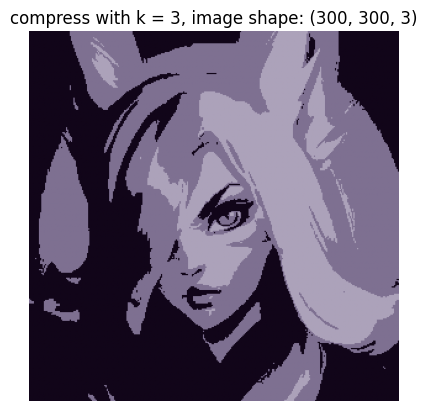

In [ ]:
main(K= 3, method= method2, format= "PNG", image= img)

k = 5

Saving result...


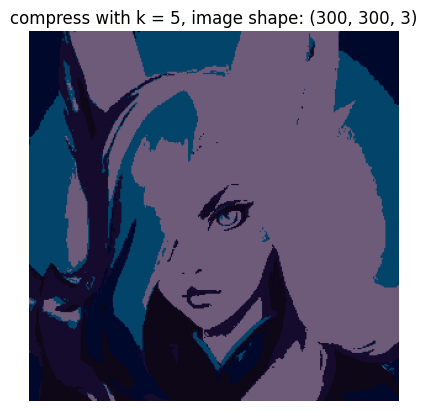

In [ ]:
main(K= 5, method= method2, format= "PNG", image= img)

k = 7

Saving result...


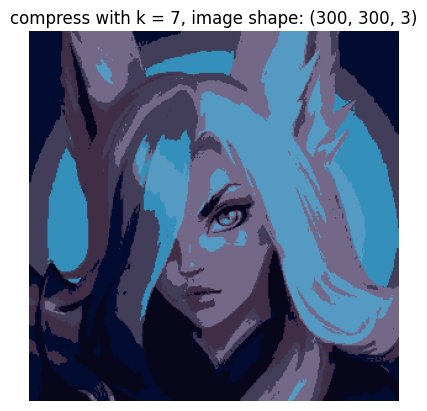

In [ ]:
main(K= 7, method= method2, format= "PNG", image= img)

k = 12

Saving result...


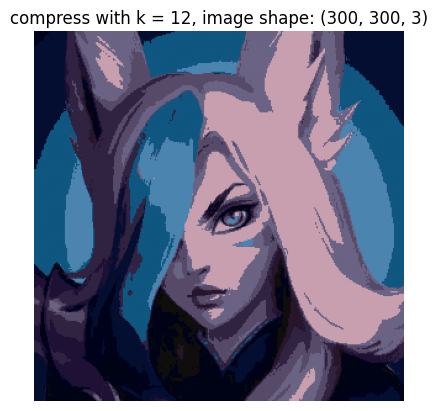

In [ ]:
main(K= 12, method= method2, format= "PNG", image= img)

k = 16

Saving result...


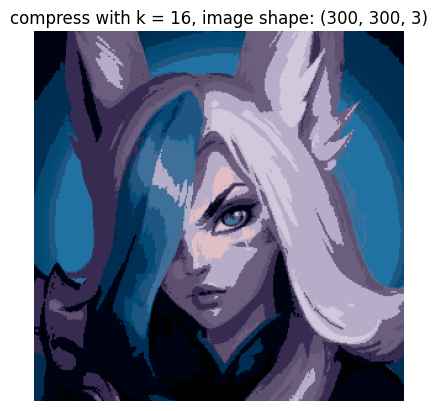

In [ ]:
main(K= 16, method= method2, format= "PNG", image= img)

Saving result...


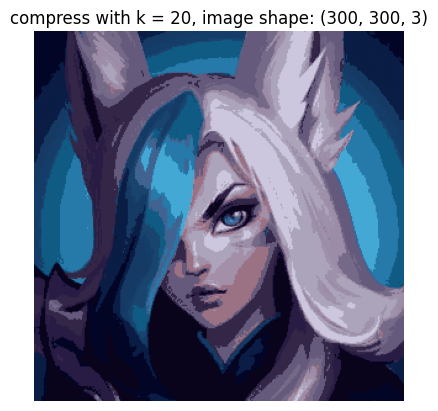

In [ ]:
main(K= 20, method= method2, format= "PNG", image= img)

Saving result...


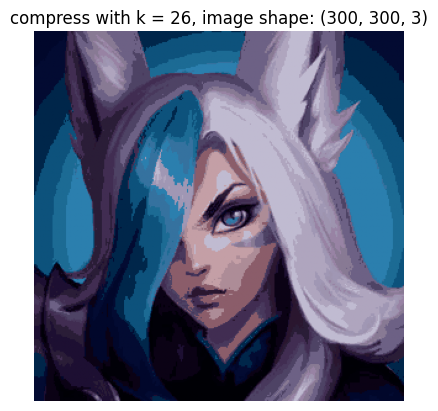

In [ ]:
main(K= 26, method= method2, format= "PDF", image= img)